<a href="https://www.kaggle.com/code/sayedshaun/companies-market-cap-revenue-analysis?scriptVersionId=169099984" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/biggest-companies-by-market-cap-and-their-revenue/company_data.csv")
df.head()

,Company Name,Market Cap,Revenue
0,Microsoft Corporation,"3,142.04B",227.58B
1,Apple Inc,"2,638.25B",385.71B
2,NVIDIA Corporation,"2,314.03B",60.92B
3,Alphabet Inc.,"1,879.86B",307.39B
4,"Amazon.com, Inc.","1,866.72B",574.79B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  500 non-null    object
 1   Market Cap    500 non-null    object
 2   Revenue       500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [4]:
def make_numeric(x):
    valid_chars = '0123456789.'
    numeric_str = ''.join([char if char in valid_chars else "" for char in x])
    if numeric_str:
        return float(numeric_str)
    else:
        return None

In [5]:
df["MarketCap(Billion)"] = df["Market Cap"].apply(make_numeric)
df["Revenue(Billion)"] = df["Revenue"].apply(make_numeric)

In [6]:
df.head()

,Company Name,Market Cap,Revenue,MarketCap(Billion),Revenue(Billion)
0,Microsoft Corporation,"3,142.04B",227.58B,3142.04,227.58
1,Apple Inc,"2,638.25B",385.71B,2638.25,385.71
2,NVIDIA Corporation,"2,314.03B",60.92B,2314.03,60.92
3,Alphabet Inc.,"1,879.86B",307.39B,1879.86,307.39
4,"Amazon.com, Inc.","1,866.72B",574.79B,1866.72,574.79


In [7]:
df.describe()

,MarketCap(Billion),Revenue(Billion)
count,500.000000,499.000000
mean,111.421200,41.495651
std,259.842661,72.422769
min,21.870000,1.220000
25%,32.102500,8.590000
50%,51.455000,18.310000
75%,95.405000,38.780000
max,3142.040000,648.130000


In [8]:
top_10_marketCap = df.sort_values(by="MarketCap(Billion)", ascending=False, ignore_index=True).head(10)
top_10_marketCap

,Company Name,Market Cap,Revenue,MarketCap(Billion),Revenue(Billion)
0,Microsoft Corporation,"3,142.04B",227.58B,3142.04,227.58
1,Apple Inc,"2,638.25B",385.71B,2638.25,385.71
2,NVIDIA Corporation,"2,314.03B",60.92B,2314.03,60.92
3,Alphabet Inc.,"1,879.86B",307.39B,1879.86,307.39
4,"Amazon.com, Inc.","1,866.72B",574.79B,1866.72,574.79
5,"Meta Platforms, Inc.","1,282.40B",134.90B,1282.40,134.90
6,Berkshire Hathaway Inc.,891.67B,439.34B,891.67,439.34
7,Eli Lilly and Company,735.08B,34.12B,735.08,34.12
8,Taiwan Semiconductor Manufacturing Company Lim...,723.02B,70.35B,723.02,70.35
9,Broadcom Inc.,626.35B,38.87B,626.35,38.87


In [9]:
top_10_Revenue = df.sort_values(by="Revenue(Billion)", ascending=False, ignore_index=True).head(10)
top_10_Revenue

,Company Name,Market Cap,Revenue,MarketCap(Billion),Revenue(Billion)
0,Walmart Inc.,488.08B,648.13B,488.08,648.13
1,"Amazon.com, Inc.","1,866.72B",574.79B,1866.72,574.79
2,MicroStrategy Incorporated,32.15B,496.26M,32.15,496.26
3,Berkshire Hathaway Inc.,891.67B,439.34B,891.67,439.34
4,Apple Inc,"2,638.25B",385.71B,2638.25,385.71
5,UnitedHealth Group Incorporated,450.93B,371.62B,450.93,371.62
6,CVS Health Corporation,99.09B,357.78B,99.09,357.78
7,Exxon Mobil Corporation,454.91B,344.58B,454.91,344.58
8,Shell plc,216.04B,323.18B,216.04,323.18
9,Toyota Motor Corporation,343.90B,308.27B,343.90,308.27


In [10]:
def kde_plot(column):
    col=df[column]
    sns.kdeplot(data=df, x=col)
    plt.title("Kde Plot")
    plt.show()
    
def distribution_plot(column):
    col=df[column]
    sns.displot(data=df, x=col)
    plt.title("Distribution Plot")
    plt.show()
    
def box_plot(column):
    col=df[column]
    sns.boxplot(data=df, x=col)
    plt.title("Box Plot")
    plt.show()

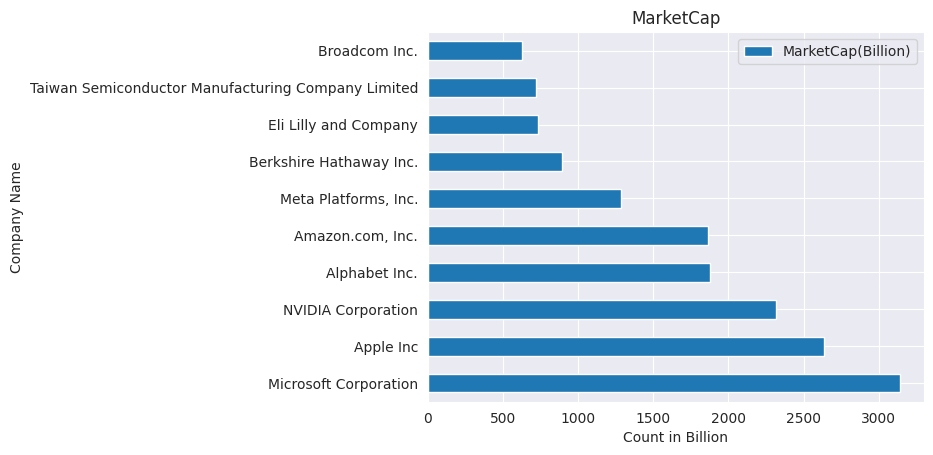

In [11]:
top_10_marketCap.plot(kind="barh", x="Company Name", y="MarketCap(Billion)")
plt.xlabel("Count in Billion")
plt.title("MarketCap")
plt.show()

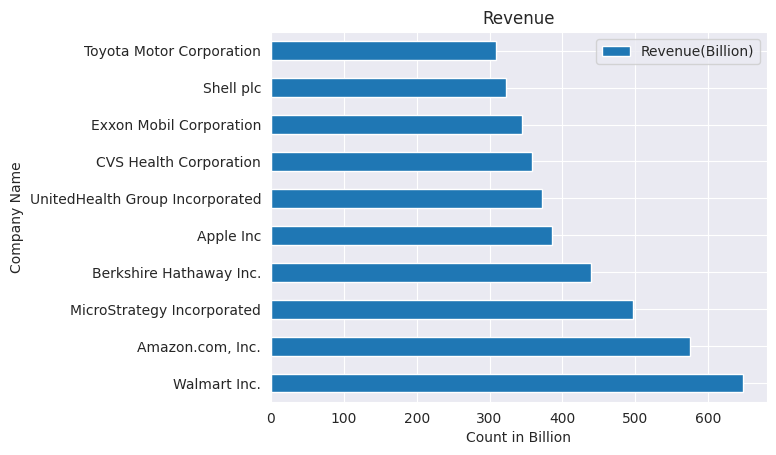

In [12]:
top_10_Revenue.plot(kind="barh", x="Company Name", y="Revenue(Billion)")
plt.xlabel("Count in Billion")
plt.title("Revenue")
plt.show()

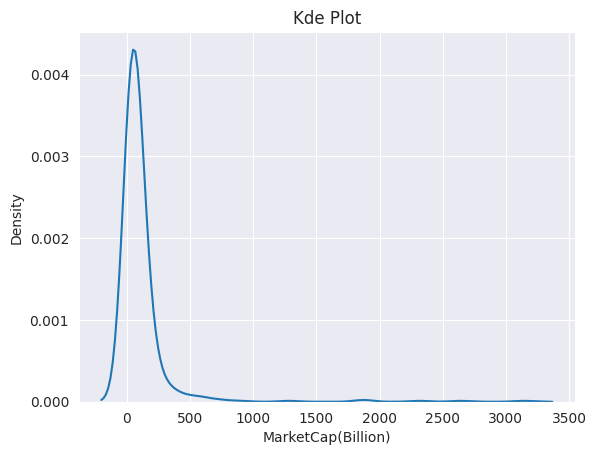

In [13]:
kde_plot("MarketCap(Billion)")

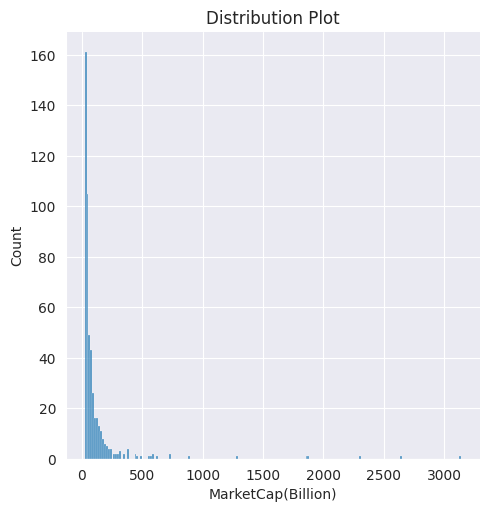

In [14]:
distribution_plot("MarketCap(Billion)")

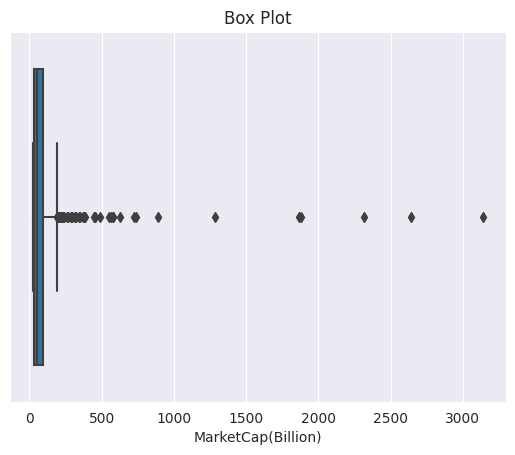

In [15]:
box_plot("MarketCap(Billion)")

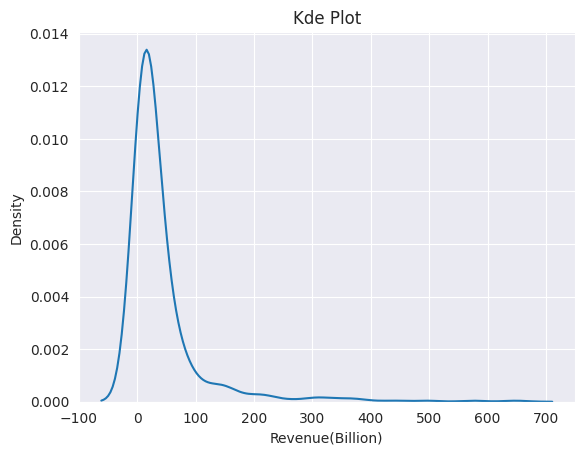

In [16]:
kde_plot("Revenue(Billion)")

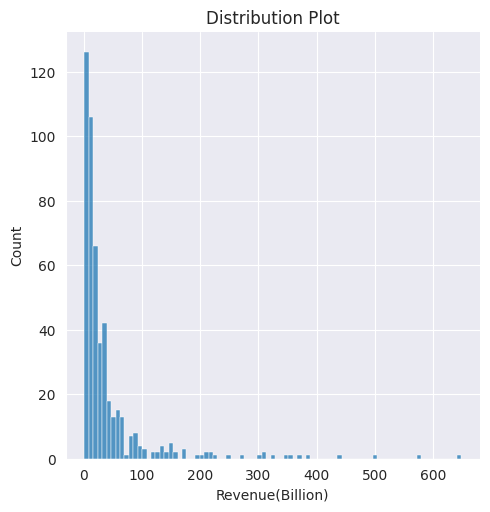

In [17]:
distribution_plot("Revenue(Billion)")

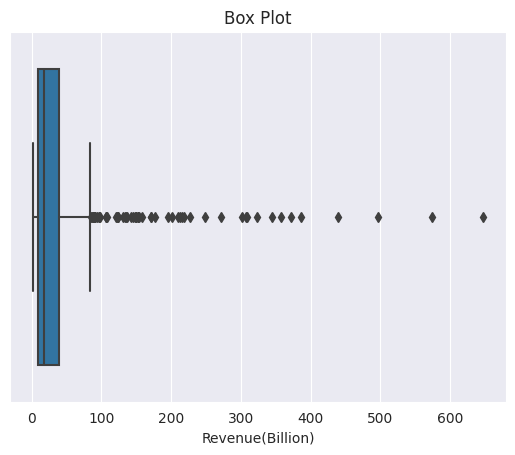

In [18]:
box_plot("Revenue(Billion)")

## The rest of the companies are nothing in front of FANNG-type companies